# Lecture

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [8]:
df = pd.read_csv('lesson_3_data_1.csv', encoding = 'windows-1251')

In [9]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [10]:
user_df = df[['tc', 'art_sp']]

In [24]:
user_df = user_df.rename(columns = {'id' : 'user_id'})

In [16]:
brand_name = 'MARAVILLA 500 G Store_Brand'

In [17]:
brand_name.split(' ')[-1]

'Store_Brand'

In [18]:
def split_brand_name(name):
    return name.split(' ')[-1]

In [20]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand_name)

In [21]:
# user_df.brand_info.apply(lambda x: x.split(' ')[-1])
# более компактный способ получить имя бренда

In [27]:
users_purchases = user_df \
                        .groupby('user_id', as_index = False) \
                        .agg({'brand_name' : 'count'}) \
                        .rename(columns = {'brand_name' : 'purchases'})

In [30]:
users_purchases.purchases.median()

2.0

In [38]:
users_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [35]:
users_purchases = users_purchases.query('purchases >= 5')

In [52]:
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index = False) \
        .agg({'brand_info' : 'count'}) \
        .sort_values(['user_id', 'brand_info'], ascending = [False, False]) \
        .groupby('user_id') \
        .head(1) \
        .rename(columns = {'brand_name' : 'lovely_brand', 'brand_info' : 'lovely_brand_purchases'})
# тут head(1) возвращает первое для каждого юзера, потому что сделали groupby

Добавим для user_df количество уникальных брендов

In [56]:
users_unique_brands = user_df.groupby('user_id', as_index = False) \
                            .agg({'brand_name' : pd.Series.nunique}) \
                            .rename(columns = {'brans_name' : 'unique_brands'})

In [57]:
users_unique_brands.head()

,user_id,brand_name
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


Что такое Series, nunique?

In [59]:
x = pd.Series([1, 2, 3]) #это продвинутый список, где можно найти медиану и т.п.

In [60]:
x

0    1
1    2
2    3
dtype: int64

In [65]:
users_unique_brands.user_id.nunique() # каждая колонка - пандасовская серия

11764

In [66]:
d = {'x' : [1, 2, 3], 'y' : ['a', 'b', 'c']}

In [68]:
d = pd.DataFrame({'x' : [1, 2, 3], 'y' : ['a', 'b', 'c']}) 
# то есть датафрейм похож на словарь, где ключ - название колонки

Объединение данных, метод merge

In [70]:
users_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [74]:
users_unique_brands.head()

,user_id,brand_name
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [75]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [76]:
?? pd.DataFrame.merge

От данных к метрикам

In [79]:
loyalty_df = users_purchases \
               .merge(users_unique_brands, on = 'user_id') \
               .merge(lovely_brand_purchases_df, on = 'user_id')

In [83]:
loyalty_df = loyalty_df.rename(columns = {'brand_name' : 'unique_brands'})

In [84]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [86]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [87]:
# нужно придумать метрику лояльности, так как некоторые у которых несколько любимых брендов не входят в таблицу

In [88]:
loyalty_df['loyality_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [89]:
loyalty_df

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000
...,...,...,...,...,...,...
3378,1408767189,5,1,Brand_4,5,1.000000
3379,1408783189,10,2,Store_Brand,8,0.800000
3380,1408783379,6,2,Brand_1,4,0.666667
3381,1408798879,8,3,Store_Brand,4,0.500000


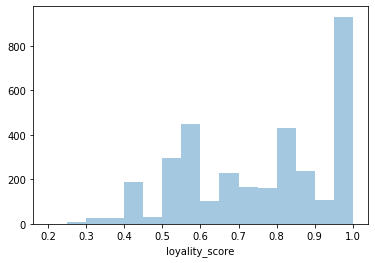

In [95]:
ax = sns.distplot(loyalty_df.loyality_score, kde = False)

In [96]:
loyalty_df.loyality_score.median()

0.8

In [99]:
brands_loyality = loyalty_df \
                            .groupby('lovely_brand', as_index = False) \
                            .agg({'loyality_score':'median', 'user_id':'count'})

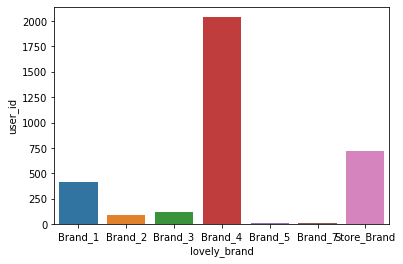

In [101]:
bx = sns.barplot(x = 'lovely_brand', y = 'user_id', data = brands_loyality)

# Homework

In [103]:
taxi = pd.read_csv('taxi_peru.csv', sep = ';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [105]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [125]:
taxi.source.value_counts(normalize = True).round(2)

iPhone     0.42
web        0.33
Android    0.21
iPad       0.02
Wap        0.01
Name: source, dtype: float64

In [134]:
driver_score_counts = taxi.driver_score \
                    .value_counts(normalize = True) \
                    .mul(100) \
                    .round(2) \
                    .reset_index() \
                    .rename(columns = {'index' : 'driver_score', 'driver_score' : 'percentage'}) \
                    .sort_values('driver_score')

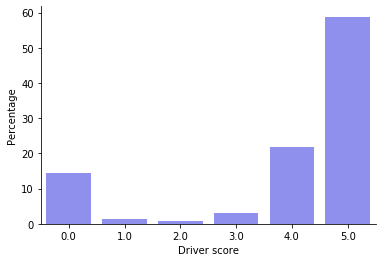

In [135]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

In [139]:
rider_score_counts = taxi.rider_score \
                    .value_counts(normalize = True) \
                    .mul(100) \
                    .round(2) \
                    .reset_index() \
                    .rename(columns = {'index' : 'rider_score', 'rider_score' : 'percentage'}) \
                    .sort_values('rider_score')

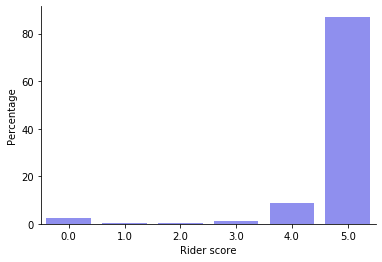

In [140]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика

# Project

In [5]:
user_data = pd.read_csv('user_data.csv')

In [6]:
logs = pd.read_csv('logs.csv')

In [7]:
logs.platform.nunique()

3

In [8]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [29]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


Какой клиент совершил больше всего успешных операций?

In [25]:
logs_successes = logs.query('success == True') \
                     .groupby('client', as_index = False) \
                     .agg({'time' : 'count'}) \
                     .sort_values('time', ascending = False) \
                     .head(9)

In [26]:
logs_successes.client.tolist()

[12179, 61468, 52870, 61473, 92584, 82563, 78349, 36165, 28719]

С какой платформы было совершено наибольшее количество успешных операций?

In [28]:
# platform_successes = 
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

Какую платформу предпочитают премиальные клиенты?

In [31]:
merged_df = user_data.merge(logs, on = 'client')

In [32]:
merged_df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [34]:
merged_df.query('success == True and premium == True').platform.value_counts().idxmax()

'phone'

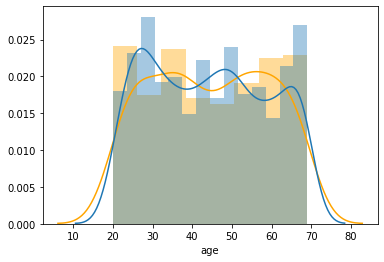

In [47]:
ax = sns.distplot(merged_df.query('premium == True').age, color = 'orange')
bx = sns.distplot(merged_df.query('premium == False').age)

In [ ]:
ax = sns.distplot(merged_df.query('premium == True').age, color = 'orange')
bx = sns.distplot(merged_df.query('premium == False').age)

Постройте график распределения числа успешных операций: 

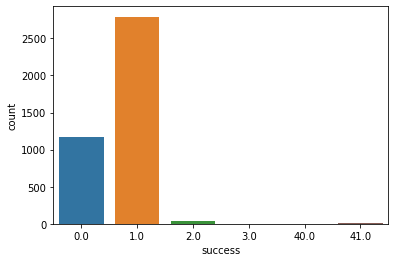

In [61]:
sns.countplot(x='success', data = logs.groupby('client').agg({'success': 'sum'}))

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

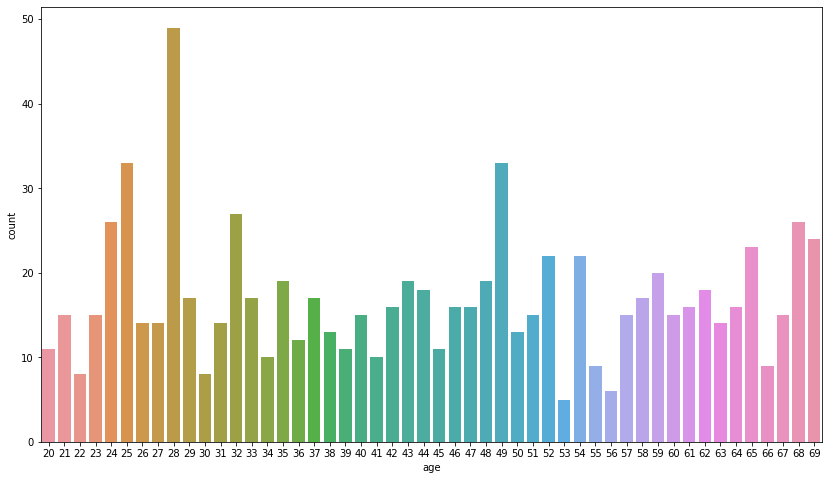

In [75]:
plt.figure(figsize=(14, 8))
sns.countplot(x='age', data = merged_df.query("platform == 'computer' and success == True"))